<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_z_time_series_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 세일 예측
- 가구 세일 데이터 사용


In [11]:
!wget https://tabsoft.co/2Y1P8oC -O Superstore.xls
# 같은 데이터임  
# !wget https://community.tableau.com/servlet/JiveServlet/downloadBody/1236-102-2-15278/Sample%20-%20Superstore.xls \
#   -O sales.xls

--2019-03-17 08:21:06--  https://tabsoft.co/2Y1P8oC
Resolving tabsoft.co (tabsoft.co)... 67.199.248.12, 67.199.248.13
Connecting to tabsoft.co (tabsoft.co)|67.199.248.12|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://community.tableau.com/servlet/JiveServlet/downloadBody/1236-102-2-15278/Sample - Superstore.xls [following]
--2019-03-17 08:21:06--  https://community.tableau.com/servlet/JiveServlet/downloadBody/1236-102-2-15278/Sample%20-%20Superstore.xls
Resolving community.tableau.com (community.tableau.com)... 204.93.79.205
Connecting to community.tableau.com (community.tableau.com)|204.93.79.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3364352 (3.2M) [application/vnd.ms-excel]
Saving to: ‘Superstore.xls’

Superstore.xls      100%[===================>]   3.21M   913KB/s    in 3.6s    

2019-03-17 08:21:11 (913 KB/s) - ‘Superstore.xls’ saved [3364352/3364352]



In [9]:
!ls -al

rm: cannot remove 'Sample%20-%20Superstore.xls': No such file or directory
total 3312
drwxr-xr-x 1 root root    4096 Mar 17 08:16 .
drwxr-xr-x 1 root root    4096 Mar 17 08:11 ..
-rw-r--r-- 1 root root     190 Mar 17 08:16 2Y1P8oC
drwxr-xr-x 1 root root    4096 Mar  8 17:25 .config
-rw-r--r-- 1 root root 3364352 Jan 22 09:48 sales.xls
drwxr-xr-x 1 root root    4096 Mar  8 17:26 sample_data


In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [12]:
df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
# 4년간의 데이터

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [13]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 
        'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture.columns

Index(['Order Date', 'Sales'], dtype='object')

In [15]:
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [16]:
furniture = furniture.set_index('Order Date')
furniture.shape

(2121, 1)

In [17]:
furniture[:3]

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940


In [22]:
# 월별 통계로 전환
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

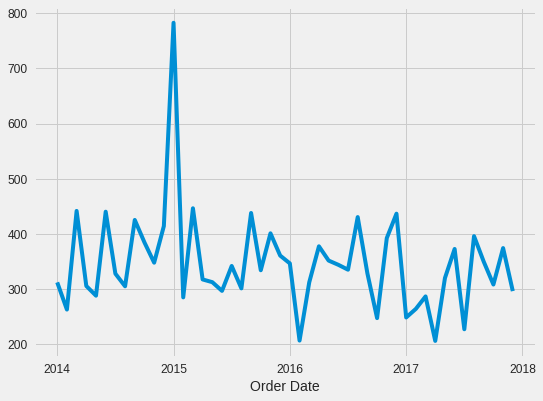

In [24]:
y.plot(figsize=(8, 6))
plt.show()

## 데이터 분해
### seasonality, trend and noise: ARIMA(p, d, q): 

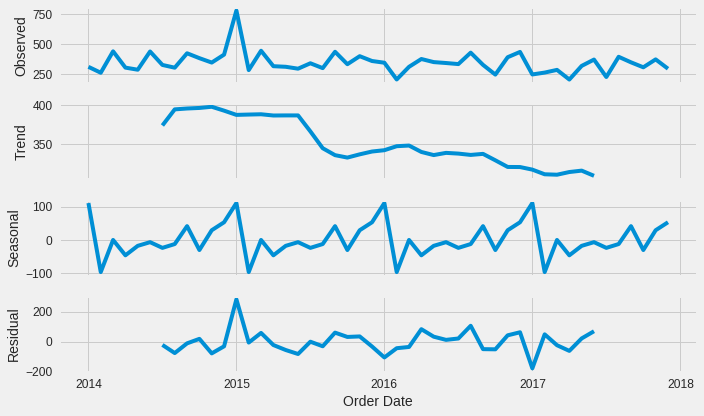

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [26]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

파라미터 선택

In [32]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1447.3867340897314
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501692


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1317.6576376825706
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.124068066613
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3179.1590875170373
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364607


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.1449552702865
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2580.6590859682783
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.44640662502366


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1368.3702584714238
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:437.46040107889746
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1745.5126161106734
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:294.1158452476943
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:538.8964721447211
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3235.0765792782004
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:412.8726989905004
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:419.1839792724933
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3058.390053094573
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:273.4032454636305
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:592.7661498749849


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1209.2050049122486
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:427.72411597383274
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:420.4114538992035
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1391.1926411825834
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:273.5840395565932
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:553.2719417804434
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:418.52617830892154
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:422.4003583322967
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3108.6759497123394
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:275.4775740530838
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:566.5211872508684


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1331.8744143801423
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:430.3305770817938
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:397.3668981651568


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1483.4090322698075
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:273.4415398792929
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:540.6257368397362


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2554.9398993240798
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:414.7726173042044
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:391.8303255667731


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2550.8134618346567
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:263.93710843812823


SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 263

In [33]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9741   6.86e-05   9.22e+07      0.000    6323.974    6323.974


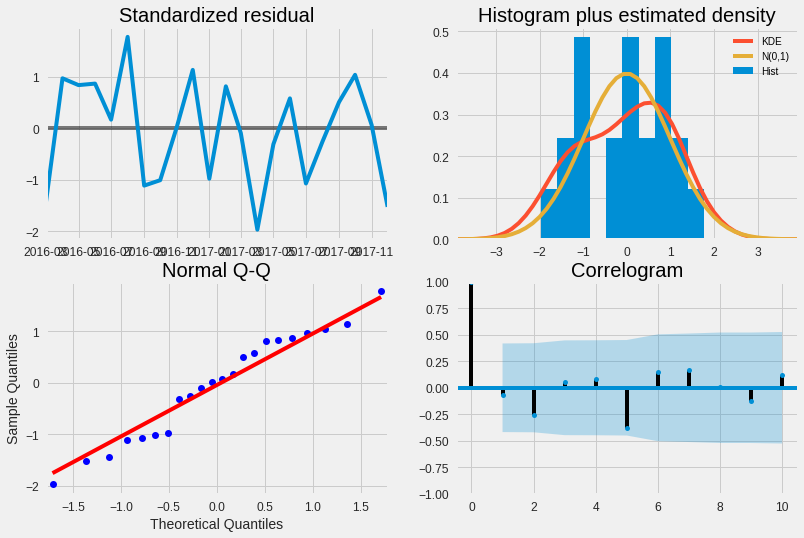

In [35]:
# 이상동작을 확인하기 위한 모델 검사(model diagnostics)
# 아래 결과를 보면 오차가 거의 정규분포를 따른다
results.plot_diagnostics(figsize=(12, 8))
plt.show()

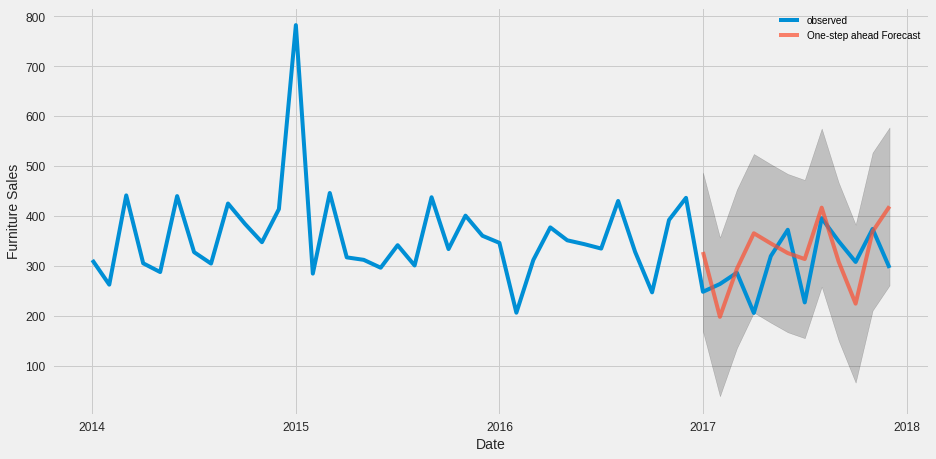

In [37]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [38]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5911.26


In [39]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 76.88


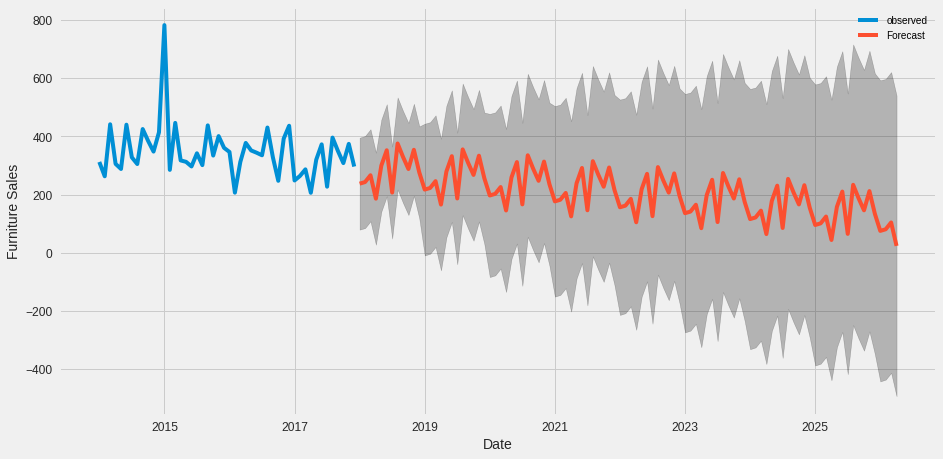

In [40]:
# confidence interval은 점차 증가한다.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


- 다른 항목의 변화와 비교 가구 <-> 사무용품

In [41]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [42]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()


,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


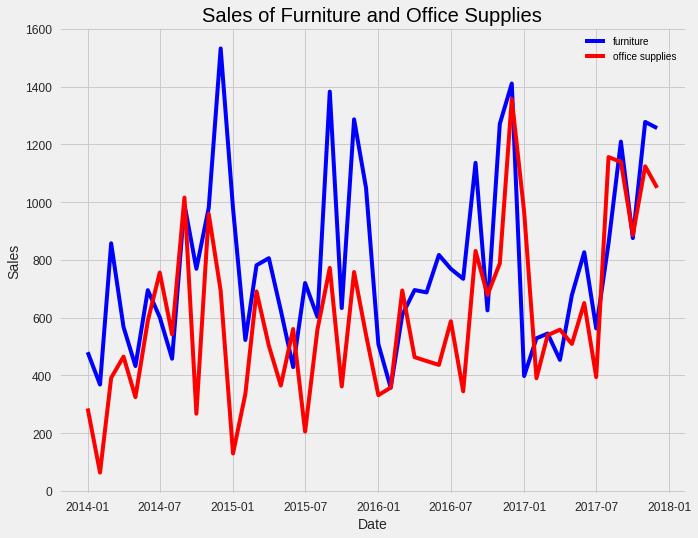

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();


- 유사한 계절적 특성을 갖는다.
- 사무용품 매출이 가구 매출을 앞지르는 시점을 찾아보겠다.

In [47]:
first_date = store.ix[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("사무용품 매출이 처음 가수매출을 앞지르는 시점: {}.".format(first_date.date()))

사무용품 매출이 처음 가수매출을 앞지르는 시점: 2014-07-01.


## Prophet
- 페이스북에서 2017년 발표
- 시간 간격이 다른 샘플을 같이 분석 가능
- 휴일 등의 변수를 사용할 수 있다.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

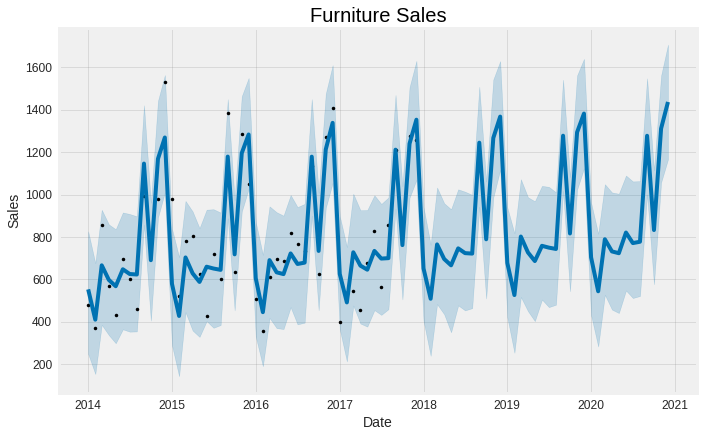

In [48]:
from fbprophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1296x432 with 0 Axes>

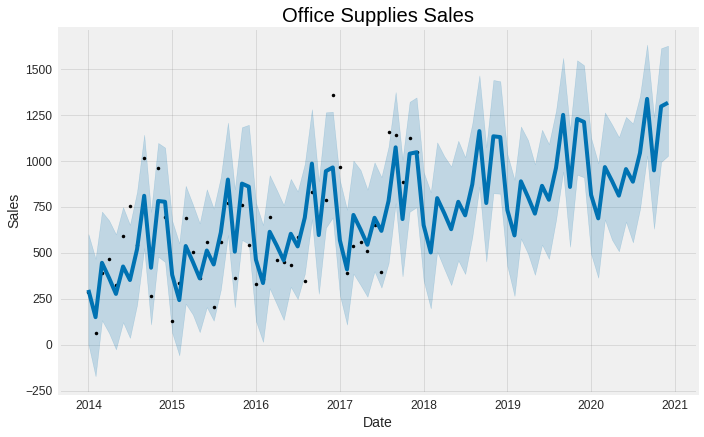

In [49]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');


### 두개의 변수를 동시에 사용한 예측 모델

In [50]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()


,Date,furniture_trend,furniture_trend_lower,furniture_trend_upper,furniture_yhat_lower,furniture_yhat_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_multiplicative_terms,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_yhat
0,2014-01-01,731.292546,731.292546,731.292546,247.620110,825.891831,-178.919274,-178.919274,-178.919274,0.0,...,-132.486932,-132.486932,-132.486932,0.0,0.0,0.0,-132.486932,-132.486932,-132.486932,297.861575
1,2014-02-01,733.388764,733.388764,733.388764,152.783752,676.232277,-324.067023,-324.067023,-324.067023,0.0,...,-288.224367,-288.224367,-288.224367,0.0,0.0,0.0,-288.224367,-288.224367,-288.224367,149.596202
2,2014-03-01,735.282122,735.282122,735.282122,384.998715,927.937661,-69.364273,-69.364273,-69.364273,0.0,...,0.846114,0.846114,0.846114,0.0,0.0,0.0,0.846114,0.846114,0.846114,445.415641
3,2014-04-01,737.378340,737.378340,737.378340,336.373714,858.923660,-140.395447,-140.395447,-140.395447,0.0,...,-89.141199,-89.141199,-89.141199,0.0,0.0,0.0,-89.141199,-89.141199,-89.141199,362.900388
4,2014-05-01,739.406938,739.406938,739.406938,298.011554,835.954738,-172.291019,-172.291019,-172.291019,0.0,...,-183.186887,-183.186887,-183.186887,0.0,0.0,0.0,-183.186887,-183.186887,-183.186887,276.085728


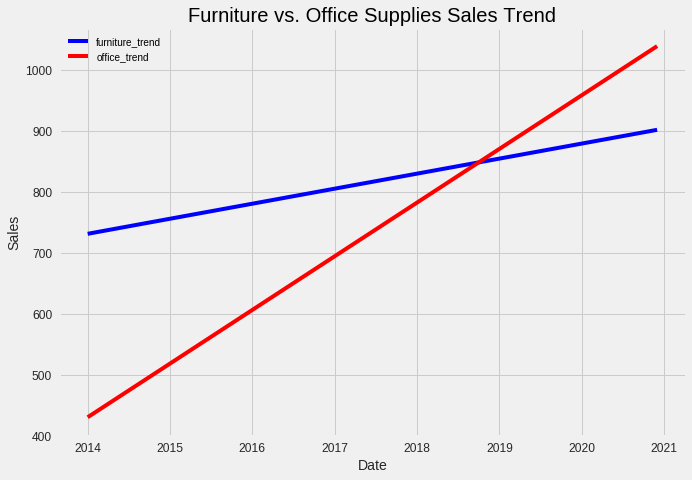

In [51]:
# 트렌드 시각화
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');


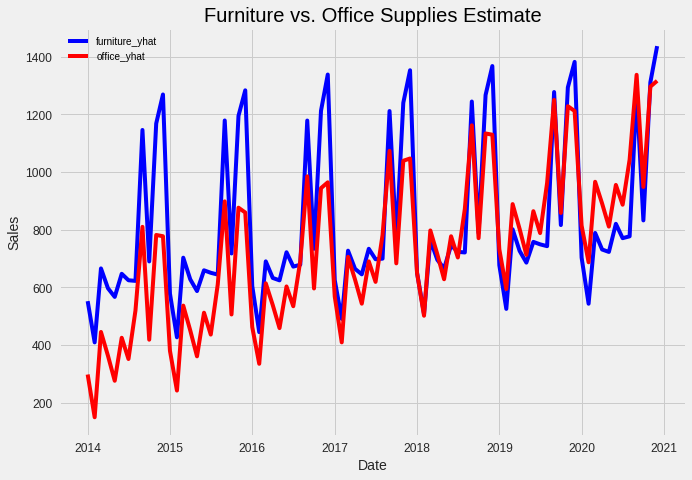

In [52]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');


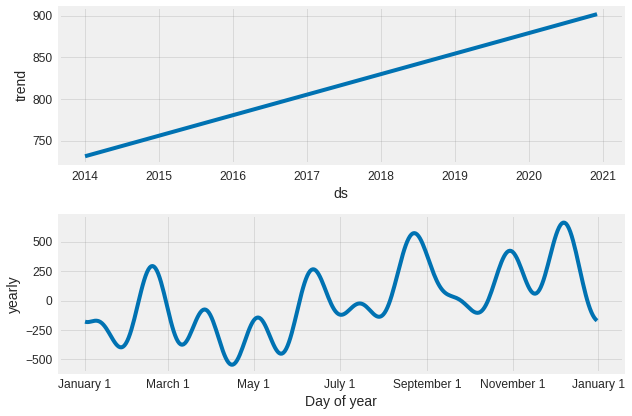

In [53]:
furniture_model.plot_components(furniture_forecast);


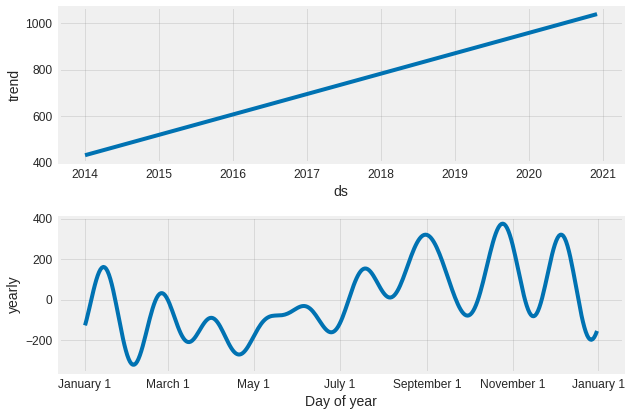

In [54]:
office_model.plot_components(office_forecast);